# Time series forecasting, part two of three

In this note we continue forecasting using exponential smoothing. Models of exponential smoothing are commonly used in touch with business applications when forecasting demand. Those models are user-friendly, they can be calculated rather quickly and they can be easily updated when new observations become available. 

Here the double exponential smoothing, i.e., the Holt model is considered. This model takes trend of the time series into account. So the model applies particularly well to the cases where there is a trend but not periodic variation in the time series.

In the Holt model _the level $L$ of the time series at the occasion $t$_ is determined by the formula

$$ L_t = \alpha \cdot Y_t + (1-\alpha) \cdot (L_{t-1} + T_{t-1}) $$

Above $Y_t$ is the latest observation and $T_{t-1}$ is the value of the trend at the previous occasion $t-1$. Trend at the occasion $t$ is evaluated from the formula

$$ T_t = \beta \cdot (L_t - L_{t-1}) + (1-\beta) \cdot T_{t-1} $$

The forecast for the occasion $t+p$ is obtained as

$$ L_t + p \cdot T_t$$

Values of the parameters $\alpha$ and $\beta$ of the model are defined so that the mean of squares of errors of predictions is as small as possible.

## Using Python with double exponential smoothing

The function for exponential smoothing is found at the library **statsmodels.tsa**.

Observe that in the example below double exponential smoothing is not the ideal model as there obviously is a periodic variation in the time series. This model ignores that periodic variation.

In [1]:
### Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

### The following style is used. 

plt.style.use('seaborn-whitegrid')

### Studying the time series

In [2]:
### Open the data.

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/time_series.xlsx')

df.head()

,Quarter,Demand
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [3]:
### Move time labels to be in the index.
### The function to_datetime converts time related strings into time labels that Python understands.
### The parameter format allows recognizing different representations as time labels.

df.index = pd.to_datetime(df['Quarter'], format = "%Y-%m-%d")

### Omit the obsolete column.

df = df.drop('Quarter', axis = 1)
df.head()

,Demand
Quarter,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


<AxesSubplot:xlabel='Quarter'>

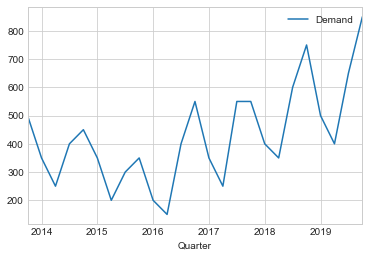

In [4]:
### Let's take a view at the line chart of the data.

df.plot()

### Fitting the model

The model for the forecast is fitted (**fit()**) to the data in the time series. As result we get an object (here named as **model**) which contains a lot of information about the model. 

Addition model (**add**) is used for the (**trend**). In addition model trend is added to the time series. 

The value **'Q'** is used for the parameter **freq**. This is because the time series consists of last days of quarter annual periods. More information on the possible values for the parameter **freq** is listed at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [17]:
### Fitting the double exponential smoothing model into the object named model.
### Addition model is used in this example.

model = ExponentialSmoothing(df['Demand'], trend = 'add', freq = 'Q').fit()

In [6]:
### The object called model gives us the simulated predictions according to the exponential smoothing model (fittedvalues).

df['Forecast'] = model.fittedvalues

df

,Demand,Forecast
Quarter,,
2013-12-31,500,456.172960
2014-03-31,350,443.611040
2014-06-30,250,361.526408
2014-09-30,400,254.648372
2014-12-31,450,273.021549
2015-03-31,350,332.011223
2015-06-30,200,330.576452
2015-09-30,300,249.336079
2015-12-31,350,248.248548


<AxesSubplot:xlabel='Quarter'>

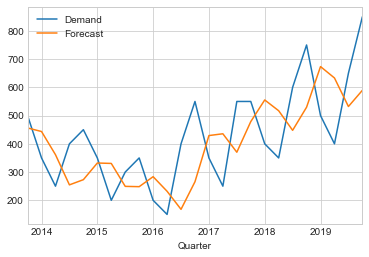

In [7]:
### Draw the original time series and the predictions by the exponential smoothing model in the same coordinate system.

df.plot()

In [18]:
### Errors of the prediction (residuals) are found in the the object named model.

df['Residual'] = model.resid

df

,Demand,Forecast,Residual
Quarter,,,
2013-12-31,500,456.172960,43.827040
2014-03-31,350,443.611040,-93.611040
2014-06-30,250,361.526408,-111.526408
2014-09-30,400,254.648372,145.351628
2014-12-31,450,273.021549,176.978451
2015-03-31,350,332.011223,17.988777
2015-06-30,200,330.576452,-130.576452
2015-09-30,300,249.336079,50.663921
2015-12-31,350,248.248548,101.751452


### Studying the model

There are several ways to estimate how good the prediction model is. In this note we consider

- line chart of time series for errors of forecast
- scatter chart of forecasted values and values of realized observations
- model statistics which is obtained by the function **summary()**.

In particular, when estimating the model, the SSE, sum of squared errors, should be considered. In the modeling the SSE is tried to be minimized.

Text(0, 0.5, 'Error of prediction')

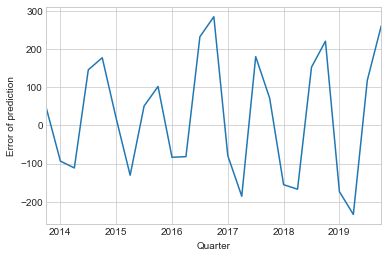

In [19]:
### Draw the errors of forecast as line chart.
### Ideally time series of errors of prediction is random.

df['Residual'].plot()
plt.ylabel('Error of prediction')

Text(0, 0.5, 'Realized demand')

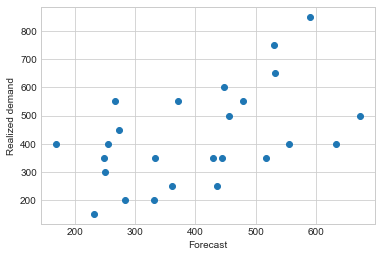

In [20]:
### Draw the scatter chart of the predicted and realized demands.
### The closer the dots follow a straight line from the lower left corner to the top right corner the better the prediction model is.

plt.scatter(x = df['Forecast'], y = df['Demand'])

plt.xlabel('Forecast')
plt.ylabel('Realized demand')

In [21]:
### Statistics for the model

model.summary()

Dep. Variable:,Demand,No. Observations:,25
Model:,ExponentialSmoothing,SSE,622379.703
Optimized:,True,AIC,261.061
Trend:,Additive,BIC,265.936
Seasonal:,None,AICC,265.727
Seasonal Periods:,None,Date:,"Thu, 21 Oct 2021"
Box-Cox:,False,Time:,20:15:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3979725,alpha,True
smoothing_trend,0.3979679,beta,True


### Calculating the forecasts

In order to determine time labels for the predictions

- The first time label of the forecasted occasions has to be the next time label after the time series.
- The number of the predicted occasions can be determined using the parameter **periods**.
- The frequency of the predicted occasions has to be the same as the value used for the parameter **freq** in fitting the model.

Further information of possible values for the parameter **freq** can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [23]:
### Check the last time label of the time series.

df.tail()

,Demand,Forecast,Residual
Quarter,,,
2018-12-31,750,529.642749,220.357251
2019-03-31,500,673.514021,-173.514021
2019-06-30,400,633.154177,-233.154177
2019-09-30,650,532.132175,117.867825
2019-12-31,850,589.475201,260.524799


In [24]:
### Add time labels for the forecasted occasions.
### The first date is later than the last time label in the time series.

index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

### Predicted values for the following eight quarters.

forecasts = model.forecast(8)

### Add forecasts to the dataframe:

df_forecast = pd.DataFrame(data = forecasts, index = index, columns = ['Forecast'])

df_forecast

,Forecast
2020-03-31,744.853759
2020-06-30,796.550620
2020-09-30,848.247481
2020-12-31,899.944343
2021-03-31,951.641204
2021-06-30,1003.338066
2021-09-30,1055.034927
2021-12-31,1106.731788


<AxesSubplot:xlabel='Quarter'>

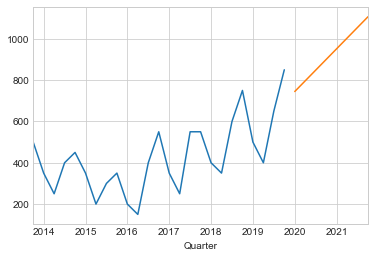

In [25]:
### Next add a line chart of the realized observations.

df['Demand'].plot()

### Add forecasted values to the same coordinate system.

df_forecast['Forecast'].plot()

### A closer look at the time series

In order to find a better prediction model study the time series a bit closer and strip the series down into components.

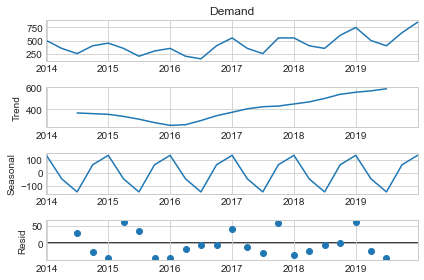

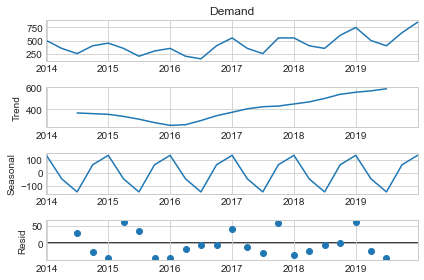

In [15]:
### Import libraries

from statsmodels.tsa.api import seasonal_decompose

### Apply the function.

seasonal_decompose(df['Demand']).plot()

There are four charts in the output.

- Original time series.
- Trend stripped off the time series.
- Seasonal variation in the time series.
- Whatever is left in the time series after the trend and the periodic variation have been dismantled.

There is a noticeable periodic seasonal variation in the time series with quarters of a year periods. Double exponential smoothing ignores this in the forecast model.

The same phenomenon can be studied using autocorrelation. In context of time series autocorrelation means correlation between the time series and a delayed time series, e.g. correlation between the time series and its values which are four quarters of a year old. For more information, see e.g., https://en.wikipedia.org/wiki/Autocorrelation. 

Autocorrelation can be calculated using different delays. This can be done with the function **autocorrelation_plot** of the pandas library.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

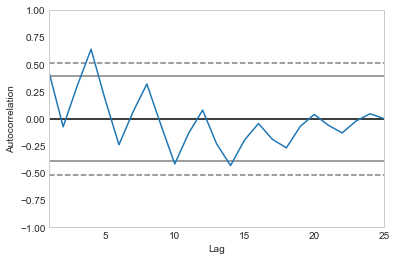

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Demand'])

In the horisontal axis there is delay (lag) and in the vertical axis values for the autocorrelation. We see that delay four possesses rather large value of autocorrelation. This indicates that there are four quarters of a year seasonal periods in the time series.

The dashed lines in the chart represent limits of statistically significant correlation. At delay four correlation is above the dashed line and therefore it is statistically significant.

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>